In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
student_data = pd.read_csv('student_data.csv')

## Model Fitting

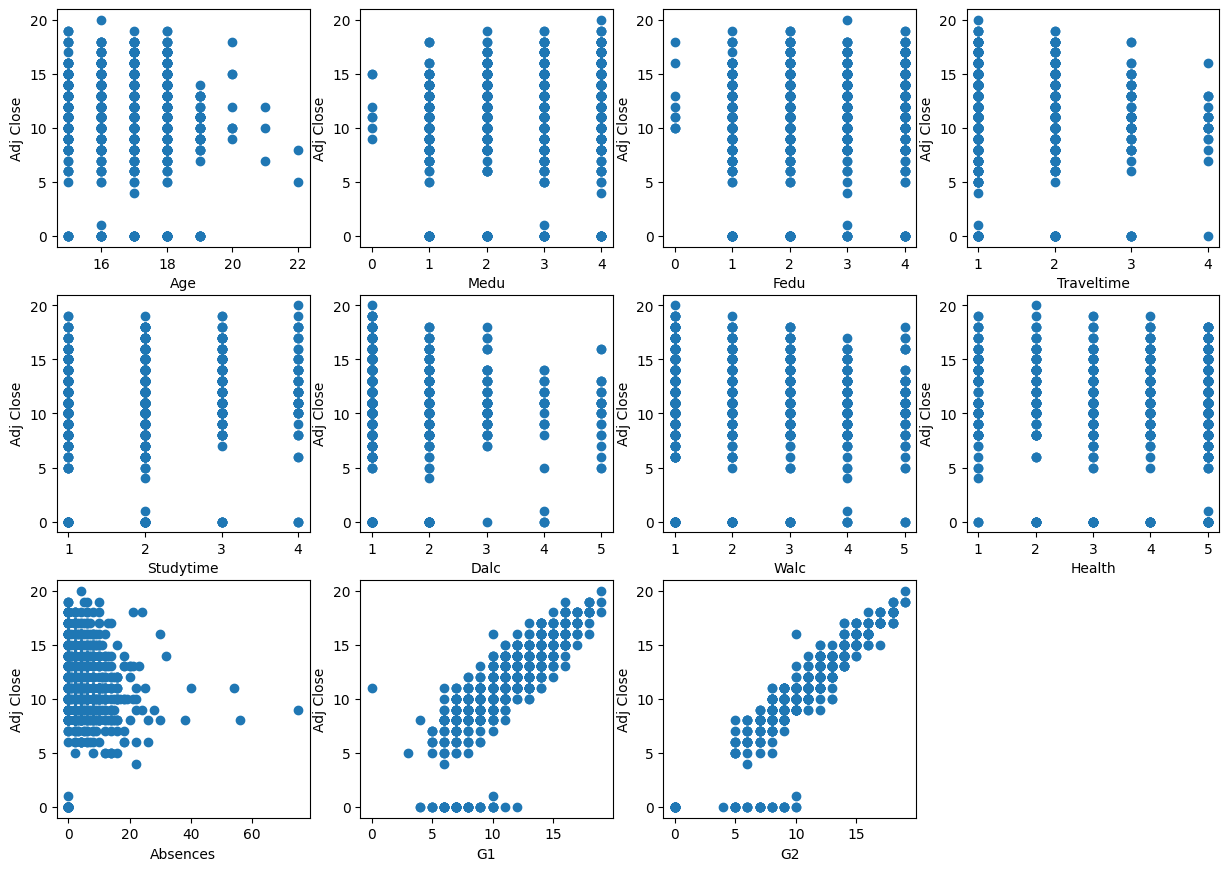

In [3]:
plt.figure(figsize=(15,10.5))
plot_count = 1
for feature in list(student_data[['age', 'Medu','Fedu','traveltime','studytime','Dalc','Walc','health','absences', 'G1', 'G2']]):
 plt.subplot(3,4,plot_count)
 plt.scatter(student_data [feature], student_data ['G3'])
 plt.xlabel(feature.replace('_',' ').title())
 plt.ylabel('Adj Close')
 plot_count+=1
plt.show()

In [4]:
df = student_data[['age', 'Medu','Fedu','traveltime','studytime','Dalc','Walc','health','absences', 'G1', 'G2', 'G3']]

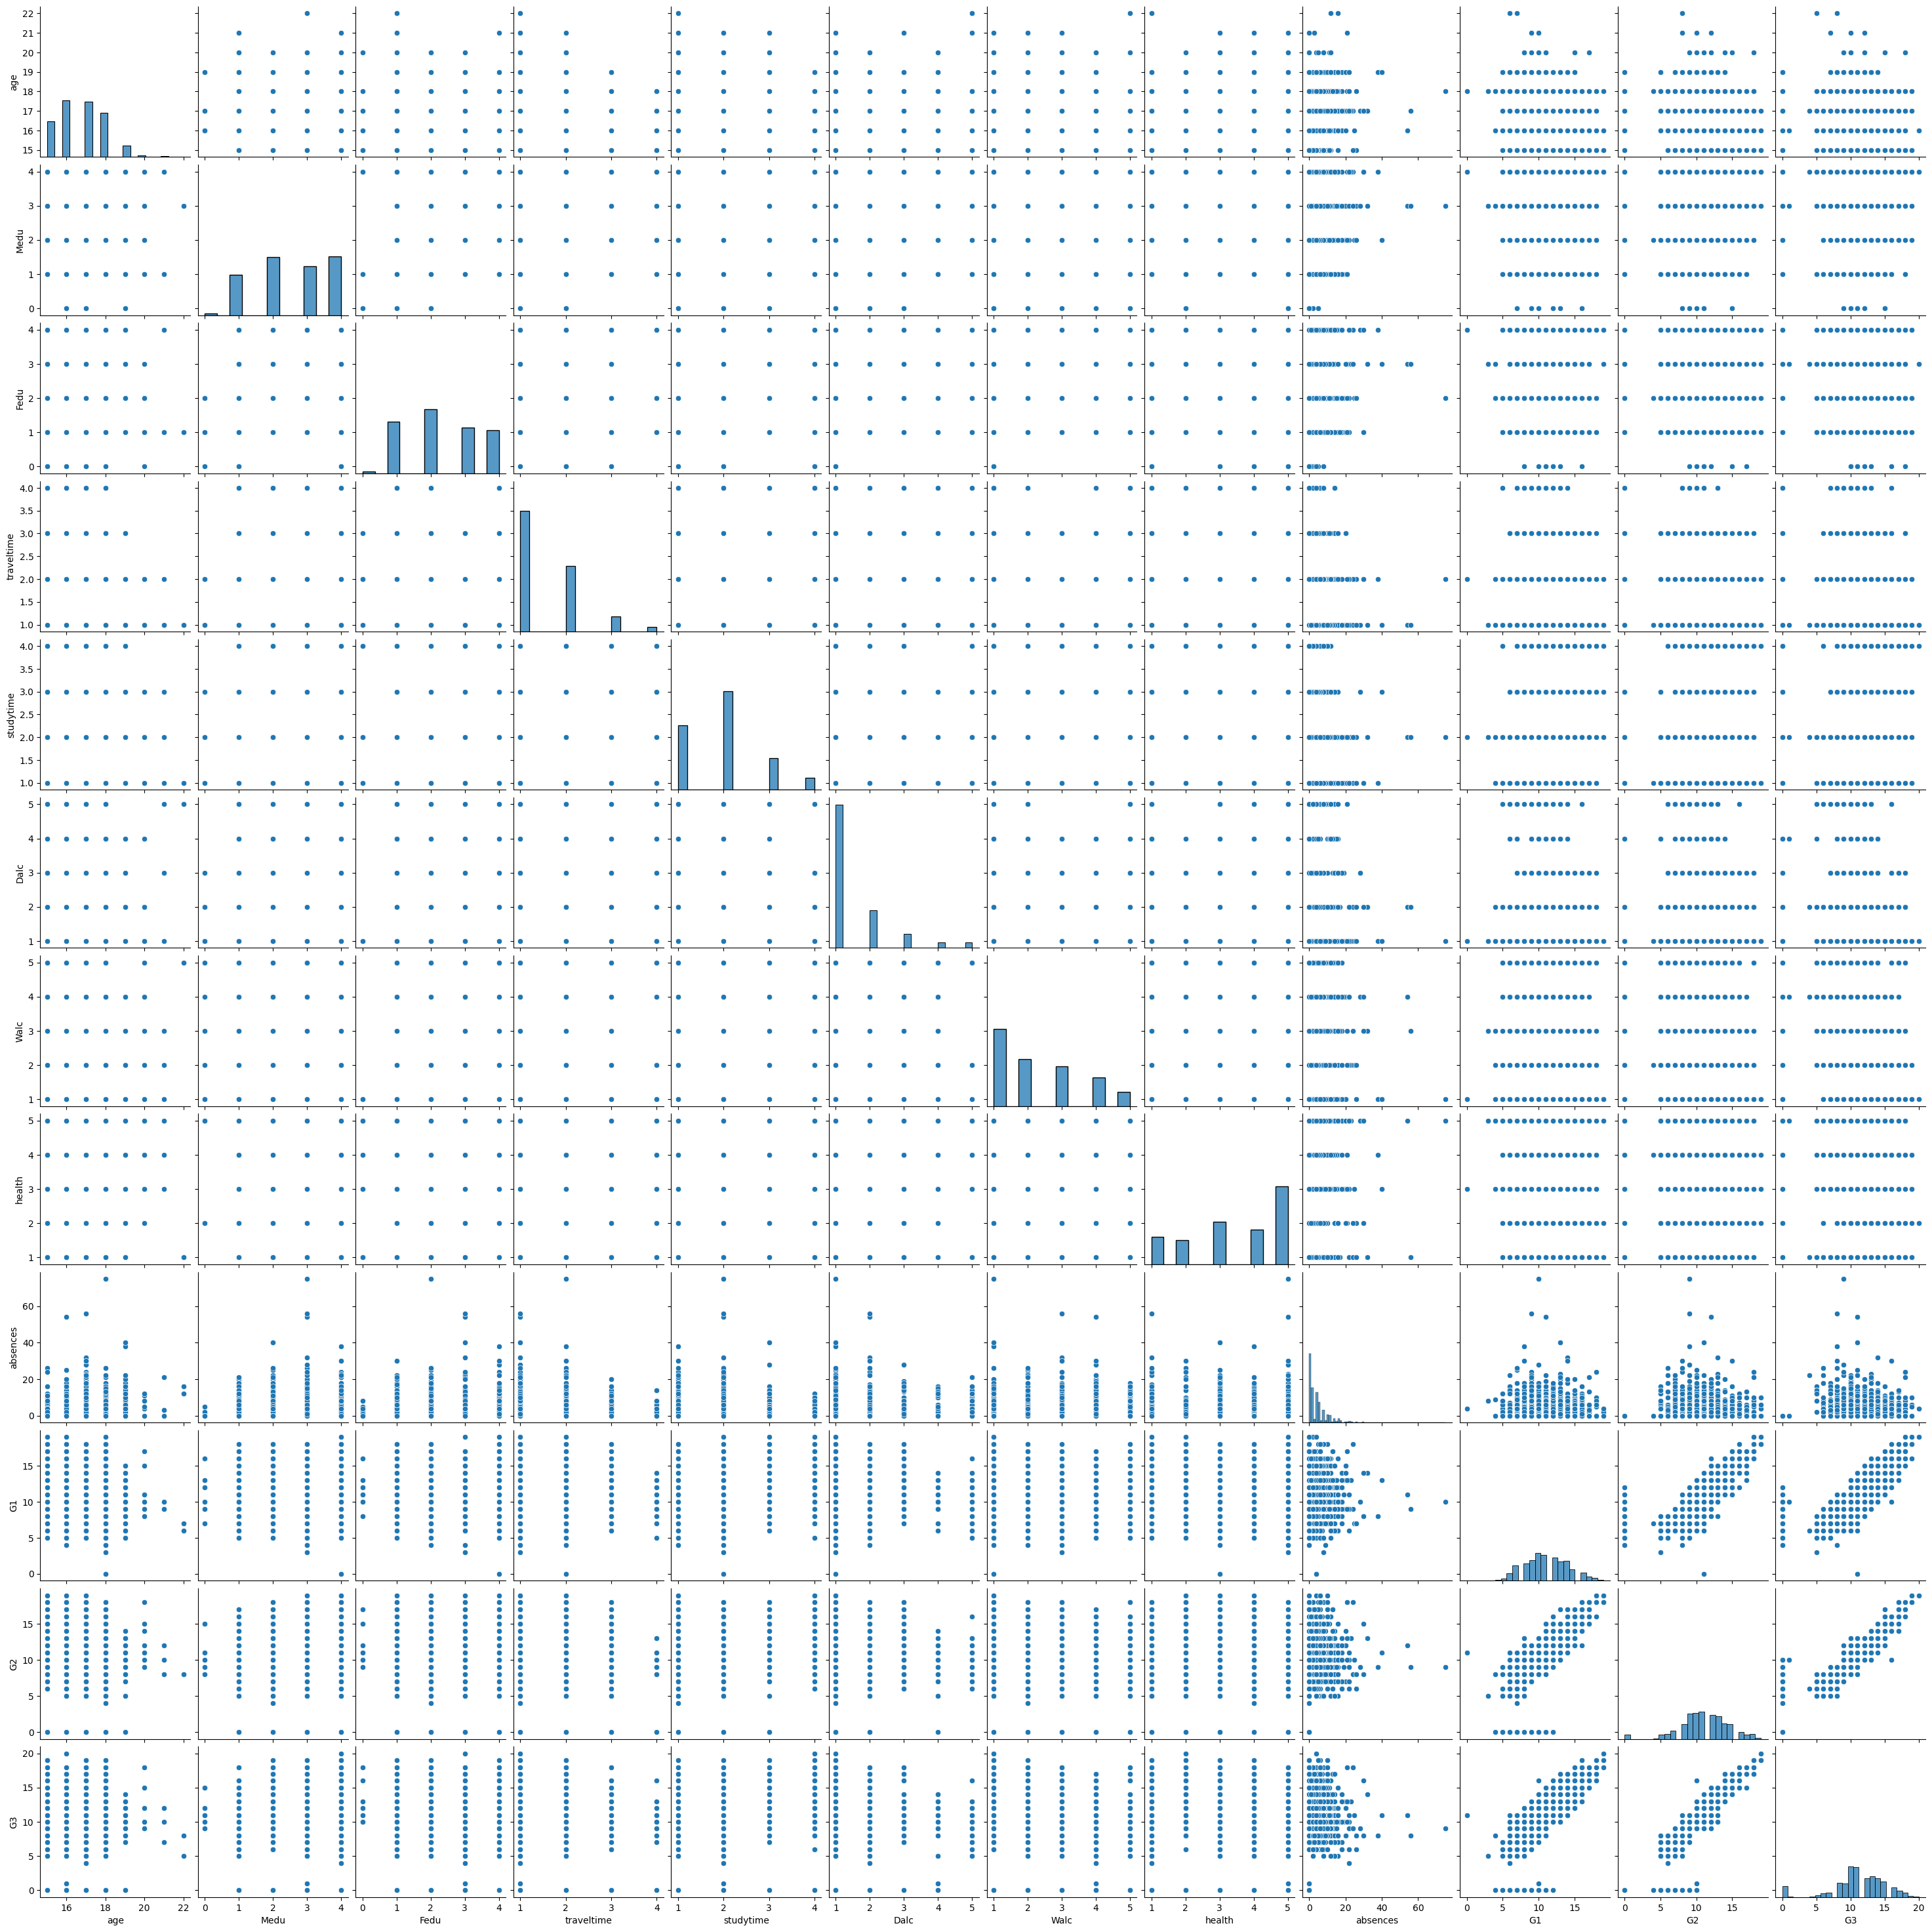

In [5]:
sns.pairplot(df)

                 age      Medu      Fedu  traveltime  studytime      Dalc  \
age         1.000000 -0.124057 -0.129475    0.019869   0.004917  0.131926   
Medu       -0.124057  1.000000  0.634713   -0.227184   0.079465  0.016090   
Fedu       -0.129475  0.634713  1.000000   -0.183077   0.021475  0.010359   
traveltime  0.019869 -0.227184 -0.183077    1.000000  -0.072937  0.102403   
studytime   0.004917  0.079465  0.021475   -0.072937   1.000000 -0.152414   
Dalc        0.131926  0.016090  0.010359    0.102403  -0.152414  1.000000   
Walc        0.090075 -0.010277  0.047081    0.066214  -0.216150  0.636246   
health     -0.038266 -0.002188  0.037431   -0.029726  -0.065896  0.057383   
absences    0.156228  0.069391  0.054697   -0.037169  -0.074679  0.123879   
G1         -0.112943  0.217157  0.191630   -0.107497   0.198438 -0.139717   
G2         -0.114680  0.214304  0.174322   -0.130468   0.170171 -0.122224   
G3         -0.118831  0.183404  0.146163   -0.091352   0.143612 -0.120278   

<AxesSubplot: >

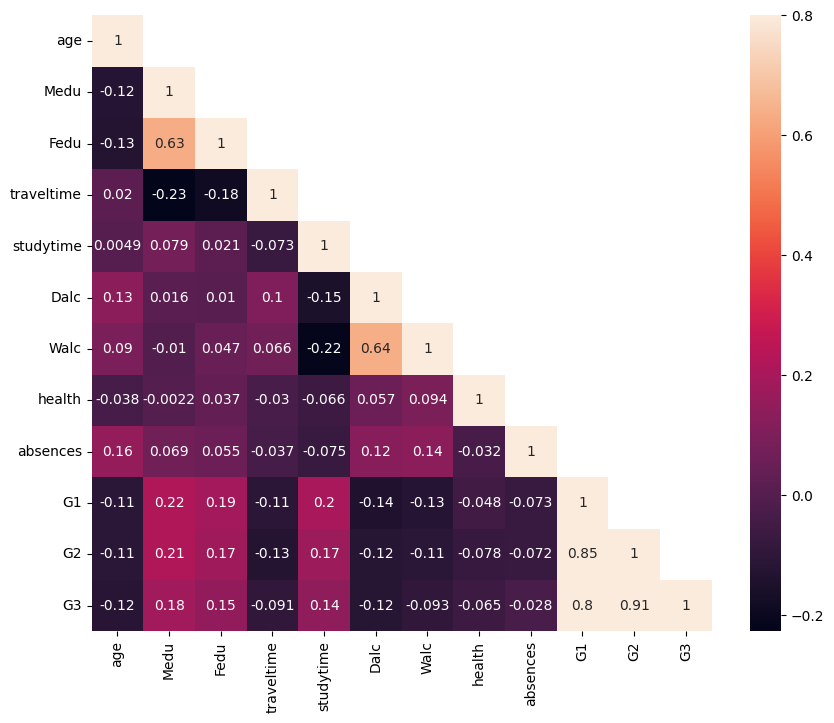

In [6]:
#Calculating correlation coefficients
corr = df.corr()
print(corr)
varcorr = df.corr()
mask = np.array(varcorr)
mask[np.tril_indices_from(mask)] = False
fig = plt.figure(figsize=(10, 8))
sns.heatmap(varcorr, mask=mask,vmax=.8, square=False,annot=True)

In [7]:
print(df.corr().abs().nlargest(6, 'G3').index)

Index(['G3', 'G2', 'G1', 'Medu', 'Fedu', 'studytime'], dtype='object')


In [8]:
X = student_data[['G2', 'G1', 'Medu', 'studytime', 'Fedu']]
y = student_data[['G3']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [9]:
from prettytable import PrettyTable
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [10]:
models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), 
                     max_samples=0.5, 
                     max_features=0.5),
    LinearRegression(),
    DecisionTreeRegressor(),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, 
                          n_estimators=300)
]

In [11]:
table = PrettyTable()
table.field_names = ["Model", 
                     "Mean Squared Error", 
                     "R² score"]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_res)
    score = model.score(x_test, y_test)    

    table.add_row([type(model).__name__, 
                  format(mse, '.2f'), 
                  format(score, '.2f')])

print(table)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

##### From the above results, it can be seen that the multiple linear regression model performs the best in model fitting, with the lowest Mean Square Error value of 3.40 and the highest R^2 value of 0.80. As a result, we choose Multiple Linear Regression model as our final model to predict Students' Grades.

## Multiple Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
print('R-Squared: %.4f' % model.score(x_test,y_test))

R-Squared: 0.8023


In [14]:
predict = model.predict(x_test)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

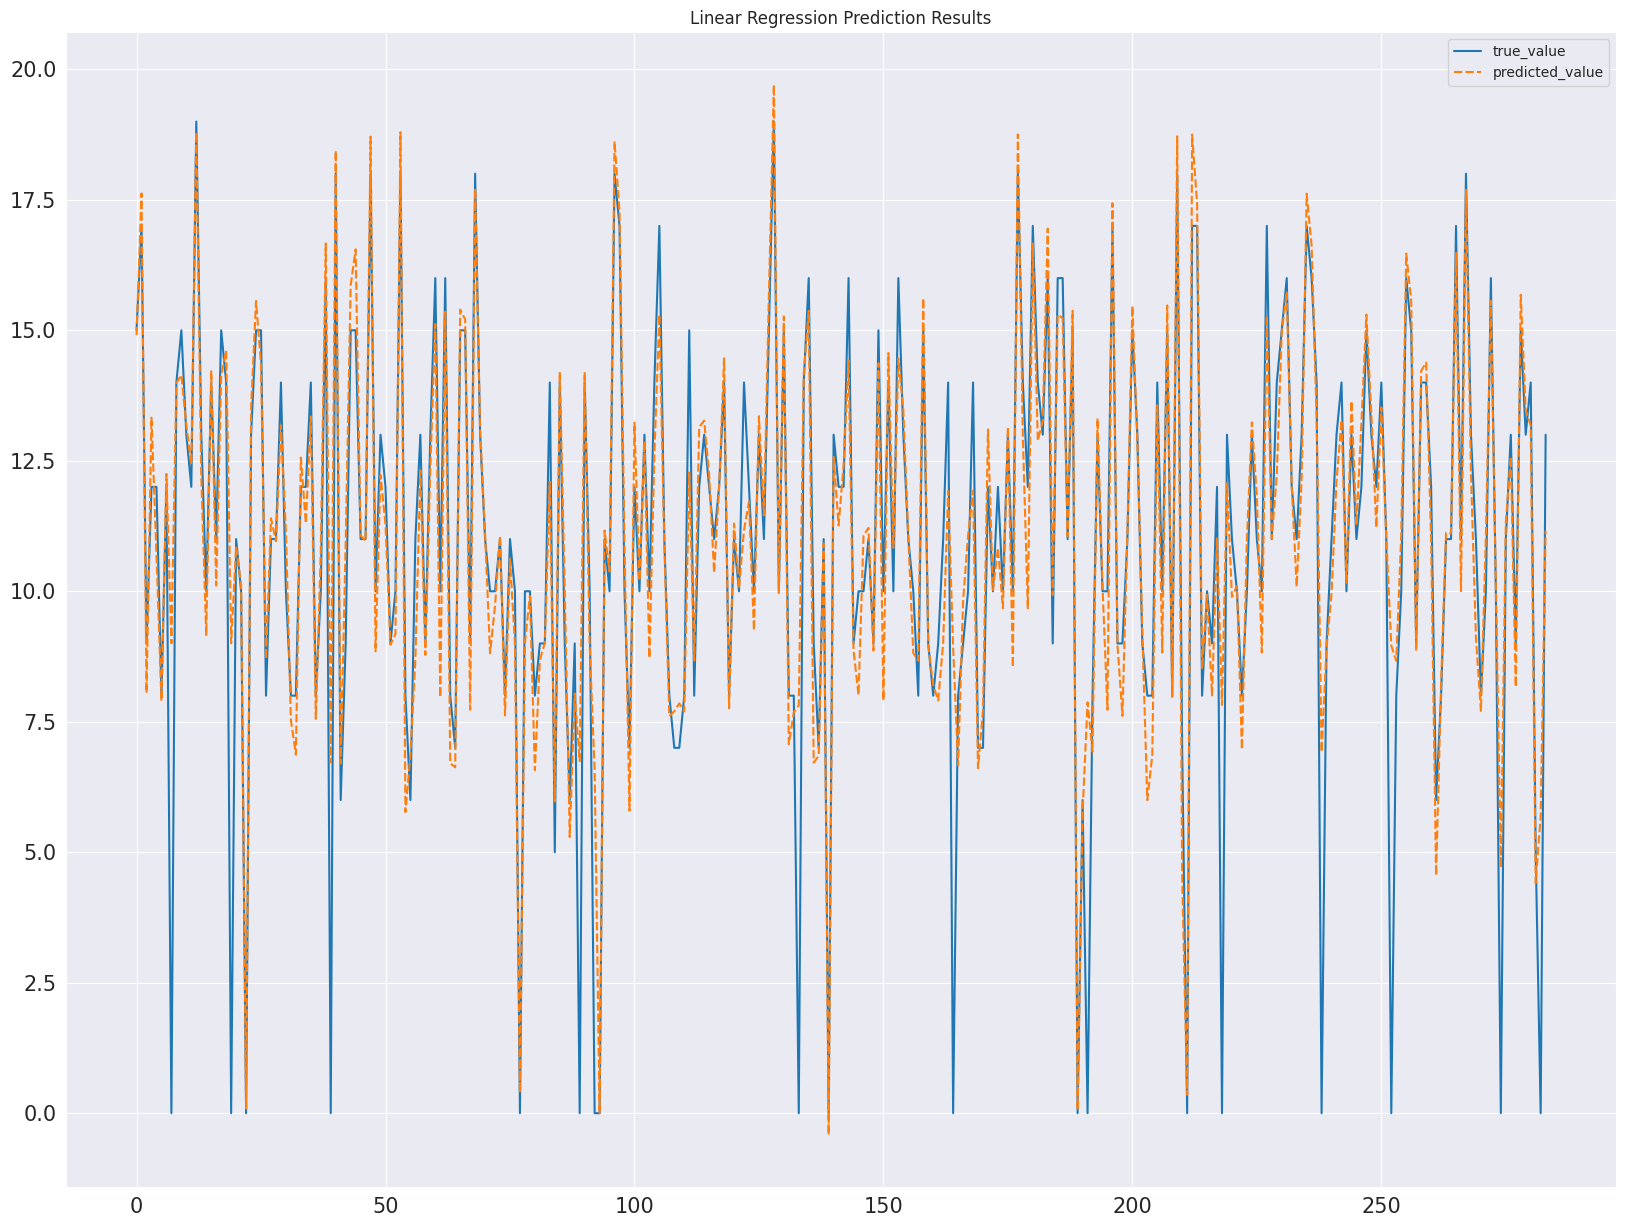

In [16]:
data = pd.DataFrame({'true_value':[i for i in y_test['G3']], 'predicted_value':[i[0] for i in predict]})
fig = plt.figure(figsize=(20, 15))
sns.set_style("dark",{"font.sans-serif":["Arial"]})
sns.lineplot(data=data)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Linear Regression Prediction Results")
plt.grid()
plt.legend()
plt.show()

## Summary and Evaluation of Model Selected

##### Through visualization and data analysis, we identified the factors that are highly correlated with the final grades of students. We used these attributes for further model analysis. 

##### In the process of model analysis, we first conduct correlation analysis on these attributes and students' final grades, so as to obtain some attributes with greater correlation and improve the performance and prediction accuracy of the model. 

##### The second step is data set partitioning. After confirming which attribute values to use, we divided the original data set into training and testing sets using a random partitioning method with a ratio of 7:3, which were used for model training and testing.

##### The third step is model selection. Different machine learning models have different characteristics and fit different data differently. We eventually selected Multiple Linear Regression model, Bagging Regression model, Decision Tree regression model and Random Forest model for performance comparison. Through the comparison above, it is easy to conclude that the Multiple Linear Regression model has the best effect on data prediction and data fitting in this case. As a result, we chose the Multiple Linear Regression model to analyze the data and further confirm the impact of these attributes on the final grades of students.

##### Finally, we trained the model using the partitioned training set and tested it using the testing set. The resulting R-square value was 0.8089, which is close to 1, indicating that the model has a high degree of fitting. For ease of observation, we conducted a visual comparison of the predicted results with the actual data. From the comparison chart, we can also see that the model has a good fitting effect, indicating that the Multiple Linear Regression was a good choice fro our data analysis.

## Comprehensive Analysis Results

##### By combining descriptive analysis and model analysis, we have explored the factors that affect students' final grades. From the analysis results, it can be seen that students' final grades are influenced by a number of factors, which is consistent with the real life situation. However, we have also identified several factors that are highly correlated with students' final grades: 

##### 'G1', 'G2', 'Medu', 'studytime', 'Fedu', which have the highest correlation with students. 

##### The first two, "G1" and "G2" are semester grades. Based on a student's semester grades, we can easily predict their final grades, thus explaining the high correlation. 

##### The latter three are the mother's education level, study time, and father's education level, indicating that parents' education level and the time invested in students' own learning also have a significant impact on students' grades. This implies that a student's grades not only depend on their own efforts but also rely on the environment they live in. The mother's education level even has a higher correlation with the student's final grades compared to their own study time. This may be due to the reason that mothers with higher education level can provide additional help to their children, thus improving their efficiency in studying. 

##### These observations are very interesting and worth pondering on. Based on our conclusions drawns from the data analysis, one might be able to invest more in the factors that have a higher impact on their grades thus to achieve better grades in the future. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=836c9daf-3707-4663-9099-373e87755d88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>